In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
plt.rcParams['figure.figsize']=(12,7)

In [21]:
os.chdir('/Users/TigeressQueen/Downloads/Python for Data Science/DS_mod10/')

In [22]:
dataset = pd.read_csv('driver-data.csv')

In [4]:
print (dataset.head())

           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [6]:
print (dataset.describe())

                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041523             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


In [23]:
x = dataset.iloc[:,[1,2]].values

In [24]:
from sklearn.cluster import KMeans

# elbow method
wcss = []
for i in range(1,11):                                 #number of clusters
    kmeans = KMeans(n_clusters=i, init = "k-means++") #init-generates centroids in the dataset based on the density
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print (wcss)                                          #list of distances

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.1096991899, 534637.777150236, 372837.10752638336, 319739.00434512284, 276911.7412252793, 252682.869366928, 229998.07378871698]


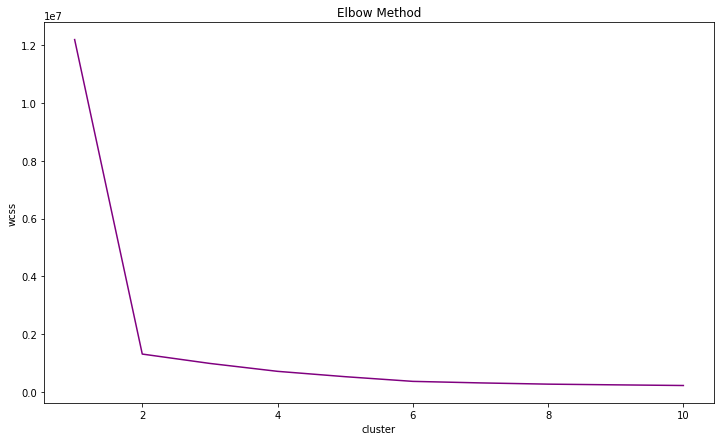

In [25]:
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)                        #cluster no. of individual drivers

In [27]:
# cluster center vectors
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [10]:
print (y_kmeans)
print (len(y_kmeans))

[0 0 0 ... 1 1 1]
4000


In [11]:
# check how many drivers are there in 1st and 2nd cluster

print (type(y_kmeans))
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


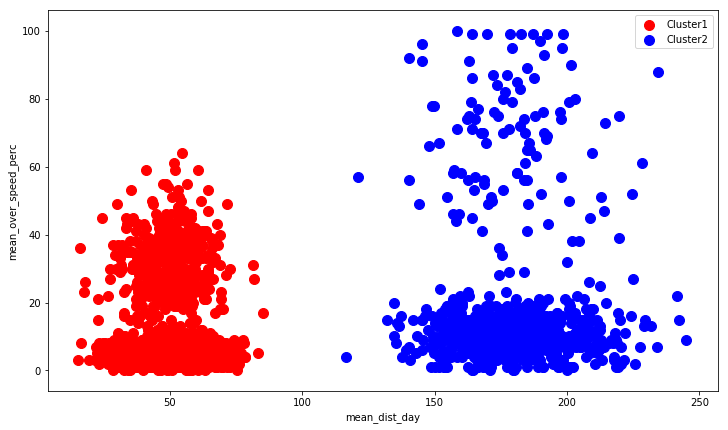

In [28]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

In [14]:
clust = pd.DataFrame(y_kmeans)

In [15]:
clust.columns = ['Cluster']

In [81]:
pd.concat([dataset,clust],axis=1)    #concat table by index

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
5,3423313857,41.91,10,0
6,3423312432,58.64,20,0
7,3423311434,52.02,8,0
8,3423311328,31.25,34,0
9,3423312488,44.31,19,0


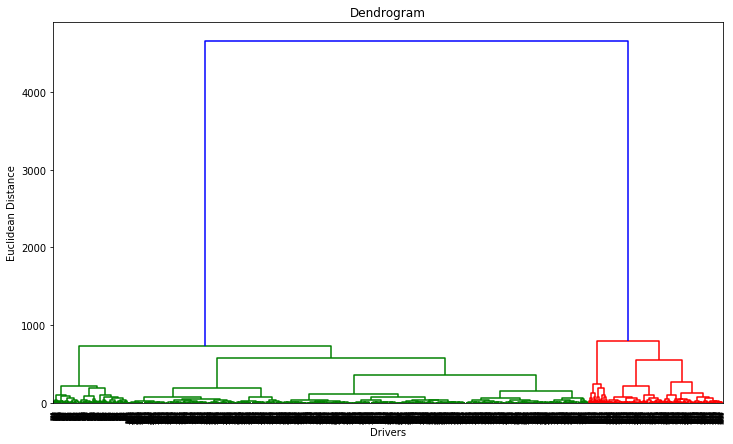

In [29]:
# create hierarchy model

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))   #creating dendrogram
plt.title('Dendrogram')
plt.xlabel('Drivers')
plt.ylabel('Euclidean Distance')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')     #creating cluster
y_hc = hc.fit_predict(x)

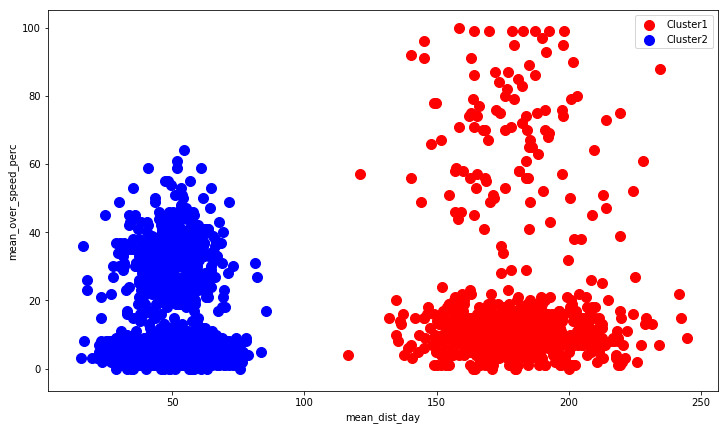

In [31]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], c='red', s=100, label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], c='blue', s=100, label='Cluster2')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()
plt.show()